In [282]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [283]:
#for not being able to get a dataset which is difficult to classify, I'm using sklearns make_classification function 
# to generate an artificial dataset with less separation between the classes
X, y = make_classification(n_samples=1000, 
    n_features=15, 
    n_redundant = 7,
    n_informative = 2,
    n_repeated = 5,
    n_classes = 2,
    n_clusters_per_class = 1,
    class_sep=4, 
    flip_y=0.1,
    random_state=1) 

In [284]:
df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'x3':X[:,2], 'x4':X[:,3], 'x5':X[:,4], 'x6':X[:,5], 'x7':X[:,6], 'x8':X[:,7], 'x9':X[:,8], 'x10':X[:,9], 'x11':X[:,10], 'x12':X[:,11], 'x13':X[:,12], 'x14':X[:,13],  'y':y})
df

x1        x2        x3        x4        x5        x6        x7  \
0    1.600754  2.429857  3.043889  1.855420  0.125218  3.043889  1.600754   
1    0.736404 -0.098813 -0.277938 -1.560093 -1.821746 -0.277938  0.736404   
2    1.431279  0.798792  0.826579 -1.066491 -2.010185  0.826579  1.431279   
3    1.250182  0.118639 -0.076800 -2.080382 -2.650359 -0.076800  1.250182   
4    0.744753  0.103733 -0.000151 -1.173734 -1.527796 -0.000151  0.744753   
5    2.578415  0.822014  0.637978 -3.145295 -4.574377  0.637978  2.578415   
6    0.861250 -0.176954 -0.409740 -1.946375 -2.225427 -0.409740  0.861250   
7    1.258110  2.099303  2.653822  1.834330  0.391233  2.653822  1.258110   
8    1.948389  1.048304  1.071300 -1.529347 -2.796825  1.071300  1.948389   
9    1.906008  0.502904  0.327121 -2.532852 -3.543253  0.327121  1.906008   
10   1.364903  0.506966  0.436797 -1.522489 -2.310527  0.436797  1.364903   
11   2.676606  3.832745  4.772125  2.645750 -0.146211  4.772125  2.676606   
12   1.006608  1.797068  2.285288  1.700597  0.494412  2.285288  1.006608   
13   1.455153  0.472694  0.372164 -1.757652 -2.568025  0.372164  1.455153   
14   2.671545  3.484217  4.292334  1.963686 -0.673117  4.292334  2.671545   
15   1.917277  0.080686 -0.257458 -3.391354 -4.221001 -0.257458  1.917277   
16   2.485235  3.483295  4.326897  2.306965 -0.252257  4.326897  2.485235   
17   1.644782  2.331358  2.899551  1.578454 -0.126729  2.899551  1.644782   
18   2.083989  2.712020  3.340166  1.520087 -0.534206  3.340166  2.083989   
19   1.988101  0.603372  0.449918 -2.485601 -3.574130  0.449918  1.988101   
20   2.390778  3.361712  4.177351  2.240724 -0.225975  4.177351  2.390778   
21   1.737747  0.620108  0.521156 -1.988658 -2.980831  0.521156  1.737747   
22   0.883209  0.472027  0.481248 -0.699549 -1.272707  0.481248  0.883209   
23   2.022988  0.494226  0.292652 -2.766753 -3.821801  0.292652  2.022988   
24   2.998406  4.212696  5.234339  2.803445 -0.288679  5.234339  2.998406   
25   1.618030  0.176177 -0.068182 -2.647610 -3.395233 -0.068182  1.618030   
26   1.536958  2.427602  3.053049  1.969118  0.266334  3.053049  1.536958   
27   1.427859  0.670290  0.649980 -1.315089 -2.200932  0.649980  1.427859   
28   3.020687  4.474810  5.591616  3.282176  0.065711  5.591616  3.020687   
29   1.533487  2.493668  3.144849  2.106615  0.376254  3.144849  1.533487   
..        ...       ...       ...       ...       ...       ...       ...   
970  1.636146  2.485502  3.113840  1.900257  0.130956  3.113840  1.636146   
971  1.486507  2.581140  3.274545  2.367170  0.617855  3.274545  1.486507   
972  1.909307  0.673550  0.561877 -2.200422 -3.287132  0.561877  1.909307   
973  1.826705  0.530899  0.380990 -2.330418 -3.320263  0.380990  1.826705   
974  2.176902  2.910950  3.596701  1.742634 -0.437510  3.596701  2.176902   
975  1.598313  2.531432  3.184473  2.061454  0.287655  3.184473  1.598313   
976  1.628741  2.297745  2.856269  1.541483 -0.142293  2.856269  1.628741   
977  1.655535  0.216037 -0.020411 -2.638002 -3.418666 -0.020411  1.655535   
978  2.645088  0.954233  0.807538 -3.006490 -4.521255  0.807538  2.645088   
979  1.308279  0.273671  0.125878 -1.880433 -2.542560  0.125878  1.308279   
980  1.702947  0.579018  0.471169 -2.005716 -2.965428  0.471169  1.702947   
981  1.485546  0.529362  0.444487 -1.701528 -2.549377  0.444487  1.485546   
982  2.004485  0.515518  0.325581 -2.690239 -3.746973  0.325581  2.004485   
983  1.879624  0.787431  0.724675 -1.919513 -3.043939  0.724675  1.879624   
984  1.395786  2.185940  2.746850  1.751185  0.213008  2.746850  1.395786   
985  0.879386 -0.150671 -0.376972 -1.927824 -2.225932 -0.376972  0.879386   
986  2.000954  0.780972  0.692429 -2.157070 -3.328920  0.692429  2.000954   
987  1.283003  0.913256  1.012989 -0.564755 -1.497295  1.012989  1.283003   
988  1.261838  1.780779  2.213730  1.195512 -0.109246  2.213730  1.261838   
989  2.545752  3.683284  4.591124  2.591621 -0.080497  4.591124  2.545752   
990  1.

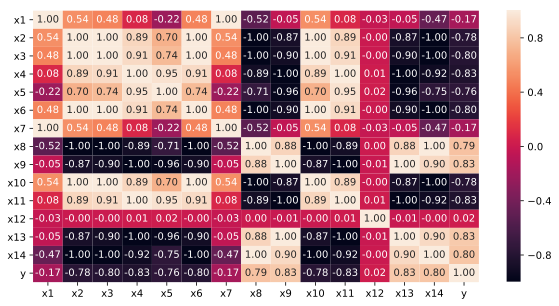

In [285]:
import seaborn as sb
%config InlineBackend.figure_format = 'svg'
#Correlation heatmap for dataset
plt.figure(figsize = (10,5))
heat = sb.heatmap(df.corr(),annot=True, fmt='.2f')

In [286]:
m = list(df.columns)
sb.pairplot(df, height=3,vars=m[0:7],hue="y",palette="husl")

In [287]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

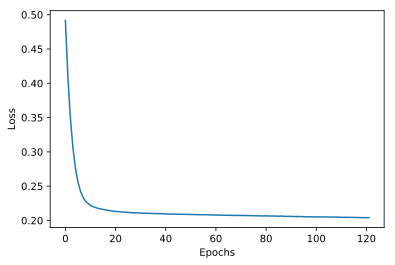

Confusion Matrix:

 [[105   5]
 [  5  85]]


Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.94      0.94      0.94        90

   micro avg       0.95      0.95      0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy:95.00%
Misclassified samples: 10


In [288]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train_std,y_train)
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test_std)

print('Confusion Matrix:\n\n', confusion_matrix(y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (y_test != predictions).sum())

In [289]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([6.94033103e-01, 2.39381675e-01, 6.65852215e-02, 2.01994763e-32,
       9.27699839e-33, 3.02136972e-33, 1.65538842e-33, 1.19181706e-33,
       1.07626575e-33, 9.87505370e-34, 7.11360601e-34, 7.55176544e-35,
       8.29814103e-42, 4.38755623e-65, 6.96385287e-66])

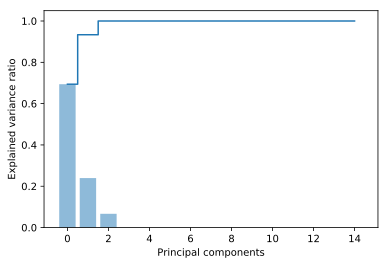

In [290]:
plt.bar(range(0, 15), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0, 15), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [291]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

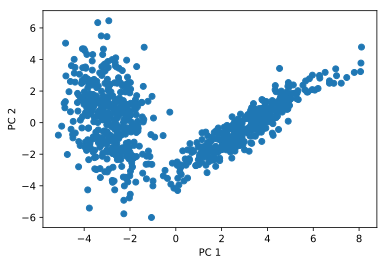

In [292]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

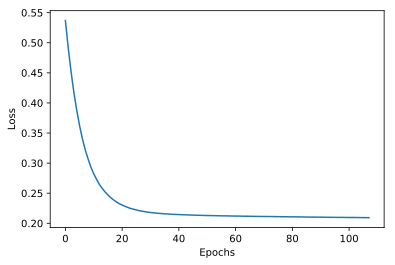

Confusion Matrix:

 [[105   5]
 [  5  85]]


Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.94      0.94      0.94        90

   micro avg       0.95      0.95      0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy:95.00%
Misclassified samples: 10


In [293]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)
mlp.fit(X_train_pca,y_train)
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test_pca)

print('Confusion Matrix:\n\n', confusion_matrix(y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (y_test != predictions).sum())

In [294]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


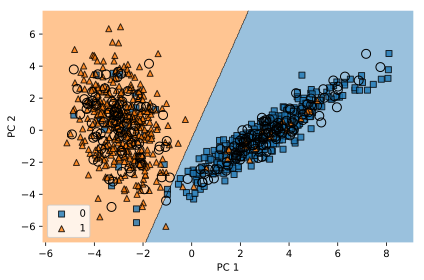

In [295]:
plot_decision_regions(X_train_pca, y_train, X_highlight=X_test_pca, clf=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_04.png', dpi=300)
plt.show()

In [296]:
y_pred = lr.predict(X_test_pca)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
print(classification_report(y_test, y_pred))
print('\n')
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.95
Confusion Matrix
[[105   5]
 [  5  85]]


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.94      0.94      0.94        90

   micro avg       0.95      0.95      0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



Accuracy:95.00%
Misclassified samples: 10


In [297]:
print(pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2']))

            x1        x2        x3        x4        x5        x6        x7  \
PC-1  0.113331  0.304924  0.307782  0.295090  0.251746  0.307782  0.113331   
PC-2  0.491158  0.094474  0.062027 -0.161324 -0.307792  0.062027  0.491158   

            x8       x9       x10       x11       x12      x13       x14  \
PC-1 -0.305849 -0.29180  0.304924  0.295090  0.005378 -0.29180 -0.308187   
PC-2 -0.085364  0.17783  0.094474 -0.161324 -0.019139  0.17783 -0.055890   

             y  
PC-1  0.050169  
PC-2  0.520742  


In [298]:
#a = df['x1'].values
#b = df['x2'].values
#X = np.array([list(i) for i in zip(a,b)])
lr = LogisticRegression()
lr.fit(X_train_std, y_train)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [299]:
y_pred = lr.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("Classification Report")
print(classification_report(y_test, y_pred))
print('\n')
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Accuracy: 0.94
Confusion Matrix
[[104   6]
 [  5  85]]


Classification Report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       110
           1       0.93      0.94      0.94        90

   micro avg       0.94      0.94      0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



Accuracy:94.50%
Misclassified samples: 11
